In [1]:
#from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
import os
from tensorflow.keras.layers import Input

In [2]:
#GPU setup : https://www.tensorflow.org/install/pip 
print(len(tf.config.list_physical_devices("GPU"))>0)

#if want to using CPU instead of GPU just uncommend command below this line
#tf.config.set_visible_devices([], 'GPU')

True


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "./image_dataset_fabric_small/"
#set path to folder image_dataset_fabric each folder for train and test 

train_dir      = os.path.join(dataset_path, "train")
validation_dir = os.path.join(dataset_path, "validation")

#rescale and data_gen 
#use xxxxxxx. for stored data in float data type 

data_gen_train  = ImageDataGenerator(rescale = 1/255.,
                                     
)
data_gen_valid  = ImageDataGenerator(rescale = 1/255.
)

train_generator = data_gen_train.flow_from_directory(train_dir,
                                                     target_size = (512, 512),
                                                     batch_size  = 32,
                                                     class_mode  = "binary"
                                                     )
valid_generator = data_gen_valid.flow_from_directory(validation_dir,
                                                     target_size = (512, 512),
                                                     batch_size  = 32,
                                                     class_mode  = "binary"
                                                     )

  
print(train_generator.class_indices  )

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'Bad': 0, 'Good': 1}


In [4]:
# create the base pre-trained model
input_tensor=Input(shape=(512, 512, 3))
base_model = InceptionV3(input_tensor=input_tensor,weights='imagenet', include_top=False)

In [5]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

                                                                                                  
 conv2d_10 (Conv2D)             (None, 61, 61, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)             (None, 61, 61, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
          

                                                                  'activation_14[0][0]',          
                                                                  'activation_17[0][0]',          
                                                                  'activation_18[0][0]']          
                                                                                                  
 conv2d_22 (Conv2D)             (None, 61, 61, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 61, 61, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 61, 61, 64)   0           ['batch_normalization_22[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 activation_26 (Activation)     (None, 30, 30, 384)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 30, 30, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 30, 30, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
          

 activation_39 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_39[0][0]'] 
                                                                                                  
 mixed4 (Concatenate)           (None, 30, 30, 768)  0           ['activation_30[0][0]',          
                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 30, 30, 160)  480        ['conv2d_44[0][0]']              
 ormalizat

                                                                  'activation_49[0][0]']          
                                                                                                  
 conv2d_54 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 30, 30, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 30, 30, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 30, 30, 160)  179200      ['activation_54[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_64 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_64[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 30, 30, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_65[0][0]'] 
          

                                                                                                  
 batch_normalization_73 (BatchN  (None, 30, 30, 192)  576        ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 30, 30, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_nor

 batch_normalization_83 (BatchN  (None, 14, 14, 384)  1152       ['conv2d_83[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_84 (Conv2D)             (None, 14, 14, 192)  245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 14, 14, 320)  960        ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 activation_87 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_nor

In [6]:
#freeze this model weight our group will train only before this layer 
base_model.trainable = False
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer      = tf.keras.layers.Dense(units = 1, activation = "sigmoid")(average_pooling_layer)

# if u want output more than 2 change sigmoid  to softmax and dense units = each class u want
#Make Transfer Learning 
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

#show model basemodel+avgpool+dense(activation = sigmoid) and well done it work
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 conv2d_10 (Conv2D)             (None, 61, 61, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)             (None, 61, 61, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 61, 61, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
          

                                                                  'activation_14[0][0]',          
                                                                  'activation_17[0][0]',          
                                                                  'activation_18[0][0]']          
                                                                                                  
 conv2d_22 (Conv2D)             (None, 61, 61, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 61, 61, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 61, 61, 64)   0           ['batch_normalization_22[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 activation_26 (Activation)     (None, 30, 30, 384)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 30, 30, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 30, 30, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
          

 activation_39 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_39[0][0]'] 
                                                                                                  
 mixed4 (Concatenate)           (None, 30, 30, 768)  0           ['activation_30[0][0]',          
                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 30, 30, 160)  480        ['conv2d_44[0][0]']              
 ormalizat

                                                                  'activation_49[0][0]']          
                                                                                                  
 conv2d_54 (Conv2D)             (None, 30, 30, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 30, 30, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 30, 30, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 30, 30, 160)  179200      ['activation_54[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_64 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_64[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 30, 30, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_65[0][0]'] 
          

                                                                                                  
 batch_normalization_73 (BatchN  (None, 30, 30, 192)  576        ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 30, 30, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 30, 30, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 30, 30, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_nor

 batch_normalization_83 (BatchN  (None, 14, 14, 384)  1152       ['conv2d_83[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_84 (Conv2D)             (None, 14, 14, 192)  245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 14, 14, 320)  960        ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 activation_87 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 activation_88 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 14, 14, 384)  0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_nor

In [7]:
#Training Phase
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"]
              )

Transfer Learning Phase 

In [8]:
#Adding callback function 

#patience = 3 mean if val_loss not decrease in last 3 epoch just stop training
early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience = 3,
            verbose = 0,

)

log_csv = tf.keras.callbacks.CSVLogger(
    filename = "training_log_transfer_learning.csv", separator=',', append=False
)

callbacks_list = [log_csv, early_stop]


In [9]:
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = valid_generator,
                    callbacks = callbacks_list
                    )

Epoch 1/20
4/4 [==============================] - 18s 3s/step - loss: 1.0046 - accuracy: 0.4600 - val_loss: 0.5762 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.4147 - accuracy: 0.7700 - val_loss: 0.2542 - val_accuracy: 0.9400
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.2243 - accuracy: 0.9400 - val_loss: 0.1615 - val_accuracy: 0.9600
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.1529 - accuracy: 0.9800 - val_loss: 0.1402 - val_accuracy: 0.9800
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.1236 - accuracy: 0.9800 - val_loss: 0.1014 - val_accuracy: 0.9800
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.0985 - accuracy: 0.9700 - val_loss: 0.1021 - val_accuracy: 0.9500
Epoch 7/20
4/4 [==============================] - 9s 3s/step - loss: 0.1061 - accuracy: 0.9500 - val_loss: 0.0936 - val_accuracy: 0.9500
Epoch 8/20
4/4 [========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


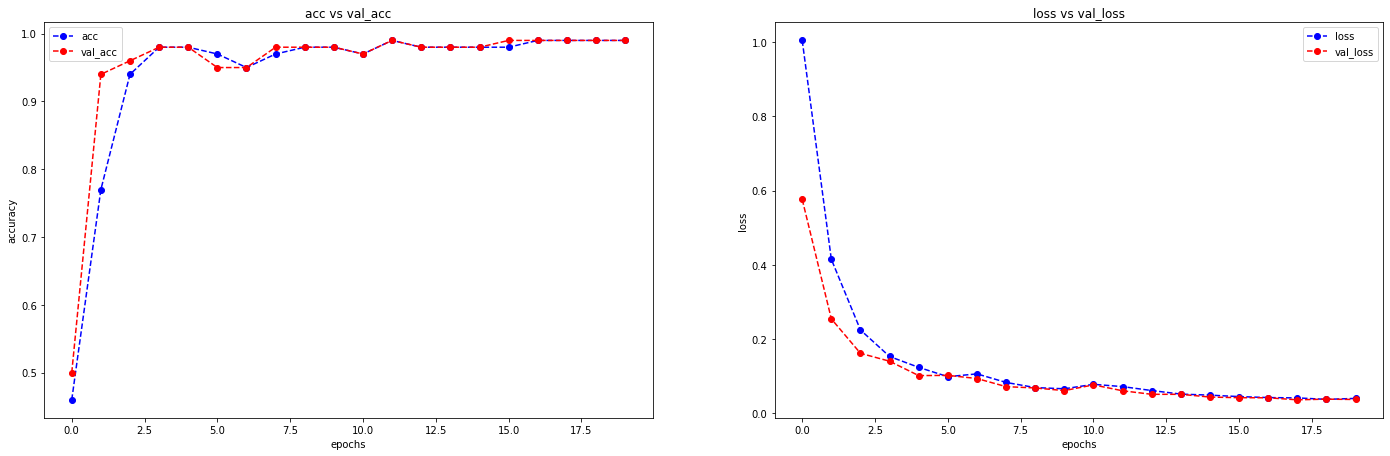

In [10]:
import learning_curve_plot as lcp
print(history.history.keys())
lcp.learning_curve_fullplot(history)

In [11]:
model.save("model_save/inceptionv3_tf.h5")

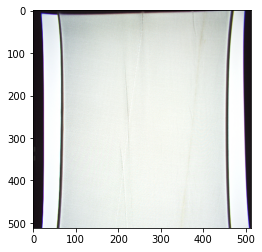

1/1 [==============================] - 0s 24ms/step
[[0.00566016]]
The image classified is bad


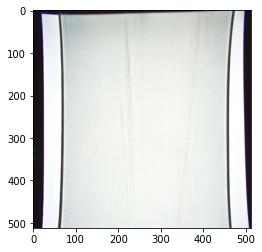

1/1 [==============================] - 0s 24ms/step
[[0.00559463]]
The image classified is bad


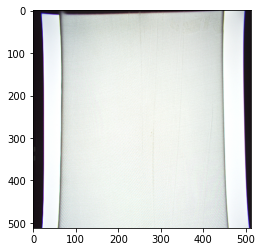

1/1 [==============================] - 0s 27ms/step
[[0.00511669]]
The image classified is bad


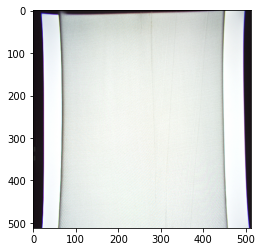

1/1 [==============================] - 0s 22ms/step
[[0.00830046]]
The image classified is bad


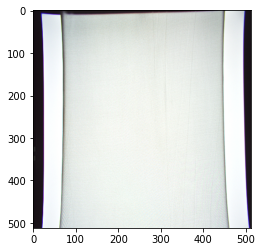

1/1 [==============================] - 0s 23ms/step
[[0.04912758]]
The image classified is bad


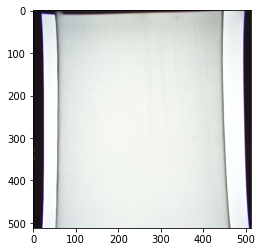

1/1 [==============================] - 0s 23ms/step
[[0.06335484]]
The image classified is bad


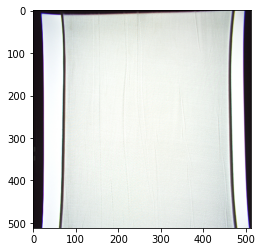

1/1 [==============================] - 0s 21ms/step
[[0.0009189]]
The image classified is bad


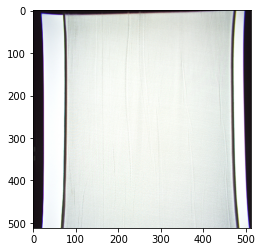

1/1 [==============================] - 0s 21ms/step
[[0.00206272]]
The image classified is bad


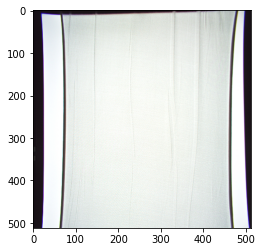

1/1 [==============================] - 0s 23ms/step
[[0.0003853]]
The image classified is bad


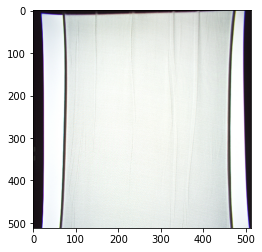

1/1 [==============================] - 0s 23ms/step
[[0.00046702]]
The image classified is bad


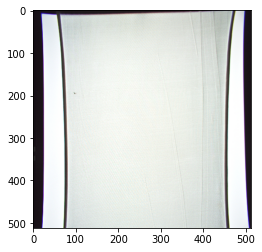

1/1 [==============================] - 0s 22ms/step
[[0.0341715]]
The image classified is bad


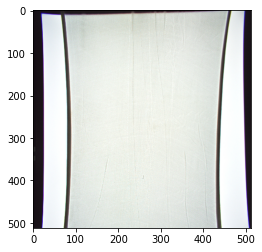

1/1 [==============================] - 0s 21ms/step
[[0.04181407]]
The image classified is bad


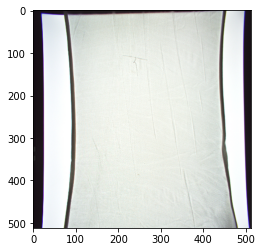

1/1 [==============================] - 0s 20ms/step
[[0.00013705]]
The image classified is bad


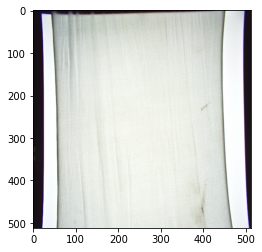

1/1 [==============================] - 0s 22ms/step
[[3.8695405e-05]]
The image classified is bad


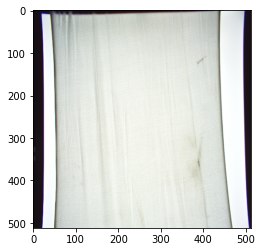

1/1 [==============================] - 0s 29ms/step
[[1.7637676e-05]]
The image classified is bad


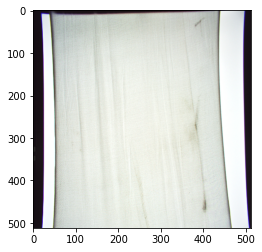

1/1 [==============================] - 0s 28ms/step
[[1.9300118e-05]]
The image classified is bad


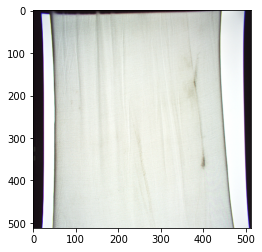

1/1 [==============================] - 0s 24ms/step
[[3.4473153e-06]]
The image classified is bad


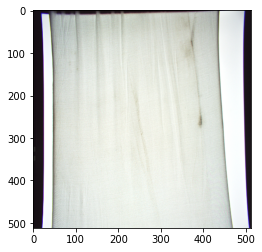

1/1 [==============================] - 0s 21ms/step
[[2.6732716e-06]]
The image classified is bad


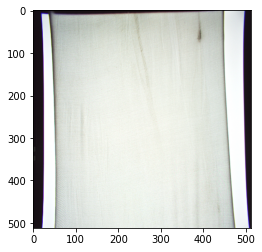

1/1 [==============================] - 0s 22ms/step
[[0.00021555]]
The image classified is bad


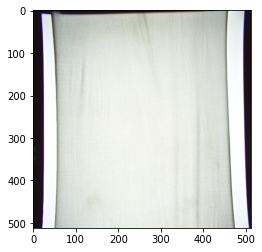

1/1 [==============================] - 0s 22ms/step
[[0.00035202]]
The image classified is bad


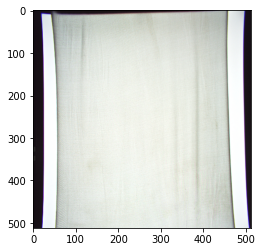

1/1 [==============================] - 0s 23ms/step
[[0.00029754]]
The image classified is bad


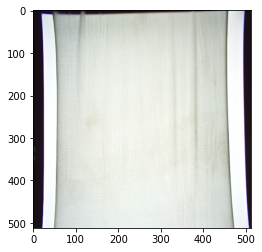

1/1 [==============================] - 0s 21ms/step
[[0.00030346]]
The image classified is bad


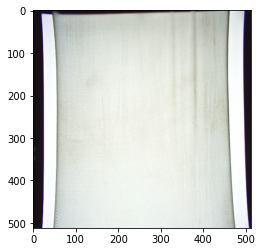

1/1 [==============================] - 0s 20ms/step
[[0.00362321]]
The image classified is bad


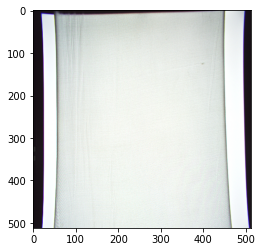

1/1 [==============================] - 0s 23ms/step
[[0.0102394]]
The image classified is bad


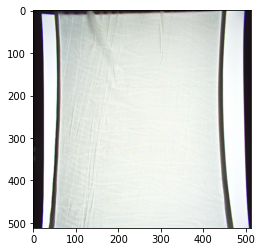

1/1 [==============================] - 0s 22ms/step
[[0.00032895]]
The image classified is bad


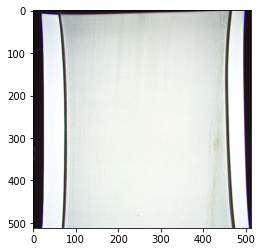

1/1 [==============================] - 0s 22ms/step
[[0.4285004]]
The image classified is bad


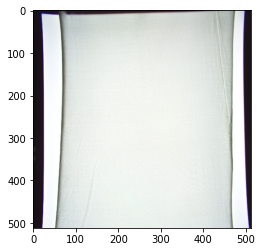

1/1 [==============================] - 0s 30ms/step
[[0.02048826]]
The image classified is bad


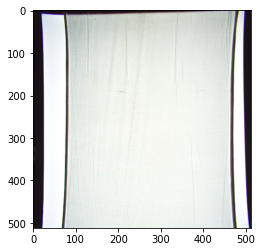

1/1 [==============================] - 0s 26ms/step
[[9.3569506e-05]]
The image classified is bad


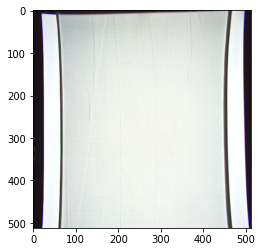

1/1 [==============================] - 0s 22ms/step
[[0.00050412]]
The image classified is bad


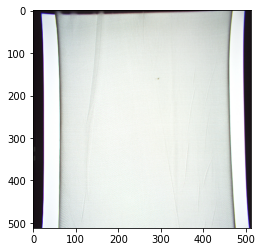

1/1 [==============================] - 0s 24ms/step
[[0.00079232]]
The image classified is bad


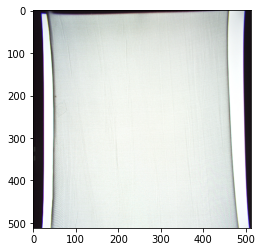

1/1 [==============================] - 0s 22ms/step
[[0.00083974]]
The image classified is bad


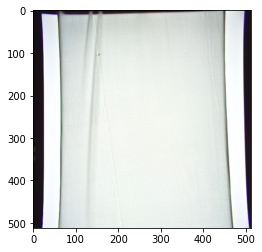

1/1 [==============================] - 0s 24ms/step
[[0.00070049]]
The image classified is bad


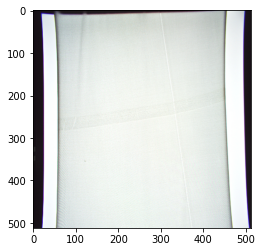

1/1 [==============================] - 0s 22ms/step
[[0.00096355]]
The image classified is bad


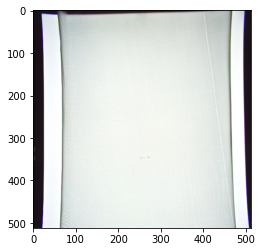

1/1 [==============================] - 0s 22ms/step
[[0.00150811]]
The image classified is bad


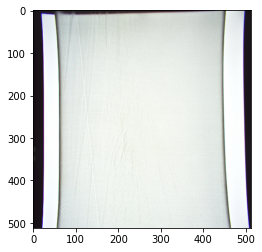

1/1 [==============================] - 0s 22ms/step
[[0.00172928]]
The image classified is bad


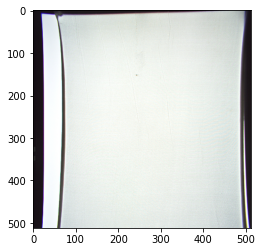

1/1 [==============================] - 0s 22ms/step
[[0.05149165]]
The image classified is bad


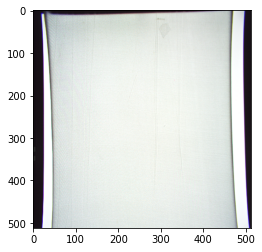

1/1 [==============================] - 0s 22ms/step
[[0.00495858]]
The image classified is bad


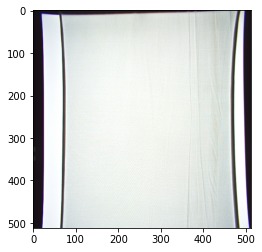

1/1 [==============================] - 0s 24ms/step
[[0.06724032]]
The image classified is bad


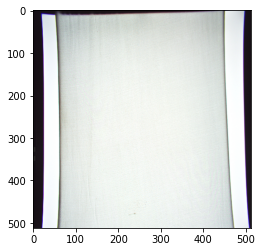

1/1 [==============================] - 0s 22ms/step
[[0.00154713]]
The image classified is bad


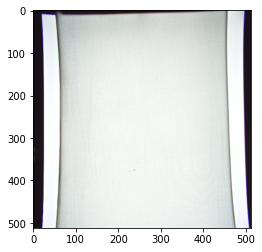

1/1 [==============================] - 0s 22ms/step
[[0.00138801]]
The image classified is bad


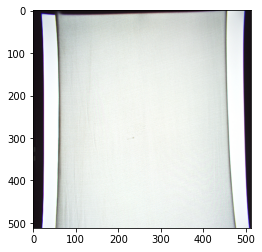

1/1 [==============================] - 0s 24ms/step
[[0.00146247]]
The image classified is bad


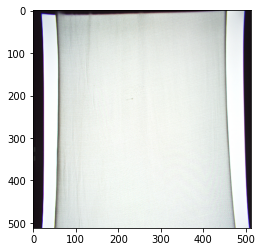

1/1 [==============================] - 0s 20ms/step
[[0.00133674]]
The image classified is bad


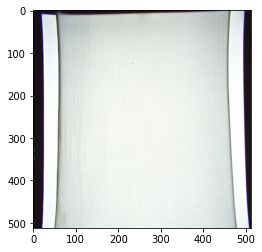

1/1 [==============================] - 0s 24ms/step
[[0.00244376]]
The image classified is bad


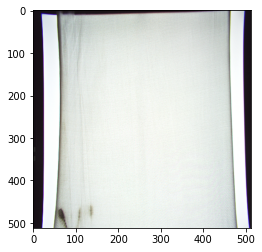

1/1 [==============================] - 0s 22ms/step
[[0.00159164]]
The image classified is bad


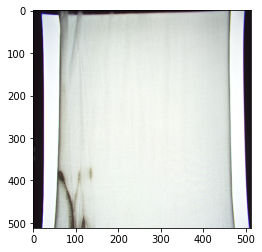

1/1 [==============================] - 0s 21ms/step
[[0.0001797]]
The image classified is bad


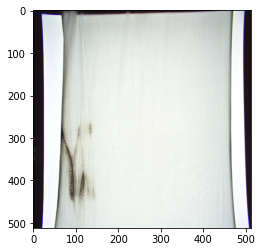

1/1 [==============================] - 0s 23ms/step
[[4.7806854e-05]]
The image classified is bad


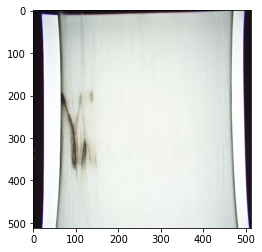

1/1 [==============================] - 0s 21ms/step
[[4.399506e-05]]
The image classified is bad


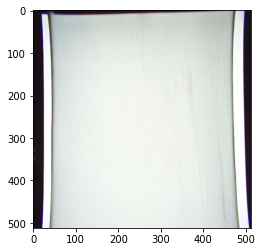

1/1 [==============================] - 0s 23ms/step
[[0.00338147]]
The image classified is bad


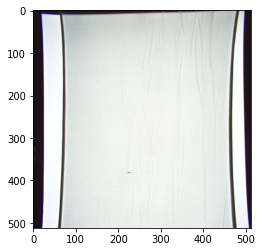

1/1 [==============================] - 0s 21ms/step
[[0.00177054]]
The image classified is bad


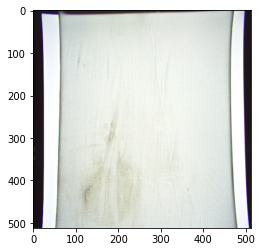

1/1 [==============================] - 0s 22ms/step
[[2.7009995e-05]]
The image classified is bad


In [13]:
dir_path = "./image_dataset_fabric_small/train/Bad"
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import os 

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"/"+i,target_size =(512, 512))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = x/255.
    x = np.expand_dims(x,axis=0)
    val = model.predict(x)
    print(val)
    threshold = 0.8
    if val[0]<threshold:
        print("The image classified is bad")
    else:
        print("The image classified is good")